In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import numpy as np
import matplotlib as mpl

In [4]:
tickers = pickle.load(open('/home/matimacazaga/Documents/Universidad/Tesis/tickers.p','rb'))

\begin{equation}
R(k)=\dfrac{1}{(n-k)\sigma^{2}}\sum_{t=1}^{n-k}(X_{t}-\mu)(X_{t+k}-\mu)
\end{equation}

In [5]:
def autocorr(x,maxlag = 252):
    mean = np.mean(x)
    var = np.var(x,ddof=0)
    n = len(x)
    lags = np.arange(1,maxlag) #maxlag = dias de trading en un año por defecto
    ac_coeffs = []
    for lag in lags:
        coeff = 0
        for t in range(0,n-lag-1):
            coeff += (x[t]-mean)*(x[t+lag]-mean)
        coeff = coeff/((n-lag)*var)
        ac_coeffs.append(coeff)
    return ac_coeffs,lags

In [4]:
lag_dict = dict()
acf_dict = dict()
tickers_utilizados = []
for ticker in tickers:
    stock = pd.read_csv('/home/matimacazaga/Documents/Universidad/Tesis/CSV/'+ticker+'.csv',sep=',')
    if len(stock)>2000:
        tickers_utilizados.append(ticker)
        stock = stock[stock['cierre'] != 0]
        returns = (stock['cierre']-stock['cierre'].shift(1))/stock['cierre'].shift(1)
        returns.dropna(inplace = True)
        returns = np.array(returns)
        acf_dict[ticker],lag_dict[ticker] = autocorr(returns)
    

In [26]:
confidence_levels = pd.DataFrame(columns =['3sigma','2sigma','1sigma'] , index = tickers_utilizados)
for ticker in tickers_utilizados:
    data = pd.DataFrame(acf_dict[ticker], columns = ['ACCoeff'])
    sigma3 = (len(data[data['ACCoeff']> 3*data['ACCoeff'].std(ddof = 0)])+len(data[data['ACCoeff'] < -3*data['ACCoeff'].std(ddof = 0)]))/(len(data))
    sigma2 = (len(data[data['ACCoeff']> 2*data['ACCoeff'].std(ddof = 0)])+len(data[data['ACCoeff'] < -2*data['ACCoeff'].std(ddof = 0)]))/(len(data))
    sigma1 = (len(data[data['ACCoeff']> 1*data['ACCoeff'].std(ddof = 0)])+len(data[data['ACCoeff'] < -1*data['ACCoeff'].std(ddof = 0)]))/(len(data))
    confidence_levels.loc[ticker,'3sigma'] = sigma3*100
    confidence_levels.loc[ticker,'2sigma'] = sigma2*100
    confidence_levels.loc[ticker,'1sigma'] = sigma1*100

In [27]:
display(confidence_levels.head())

,3sigma,2sigma,1sigma
BHIP,1.19522,2.78884,27.0916
BRIO,0.398406,5.17928,30.2789
CADO,0,3.98406,33.8645
CAPX,0.796813,3.58566,32.6693
CARC,0.796813,4.78088,26.6932


In [28]:
pickle.dump( lag_dict, open( "lags.p", "wb" ) )
pickle.dump( acf_dict, open( "acf.p", "wb" ) )
confidence_levels.to_csv('confidence_levels.csv',sep=',')

In [29]:
outside_3sigma = len(confidence_levels[confidence_levels['3sigma'] > 0.2])/np.shape(confidence_levels)[0]
outside_2sigma = len(confidence_levels[confidence_levels['2sigma'] > 5])/np.shape(confidence_levels)[0]
outside_1sigma = len(confidence_levels[confidence_levels['1sigma'] > 32])/np.shape(confidence_levels)[0]
print(outside_3sigma*100,outside_2sigma*100, outside_1sigma*100)

77.08333333333334 37.5 22.916666666666664


El $77\%$ de las acciones poseen más de $0.2\%$ datos que se encuentran fuera del canal de confianza de $3\sigma$

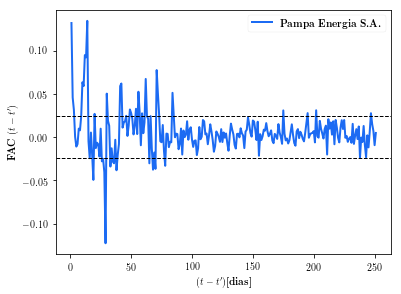

In [44]:
import matplotlib as mpl

%matplotlib inline
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'figure.figsize': [6, 4.5]
   }
mpl.rcParams.update(params)

pampa = pd.DataFrame(acf_dict['PAMP'], columns = ['ACCoeff'])
sigma_pampa = pampa['ACCoeff'].std(ddof = 0)

plt.plot(lag_dict['PAMP'],acf_dict['PAMP'], linewidth=2, color='#1c6bf3',label = r'\textbf{Pampa Energia S.A.}')

plt.xlabel(r"\textbf{$\displaystyle \left(t-t'\right)$[dias]}")
plt.ylabel(r"\textbf{FAC $\displaystyle \left(t-t'\right)$ }")
plt.axhline(y = sigma_pampa, color ='k', linestyle = '--', linewidth = 1 )
plt.axhline(y = -sigma_pampa, color ='k', linestyle = '--', linewidth = 1 )
plt.legend()
plt.savefig('ACF_PAMP.eps', format = 'eps', dpi = 1000)

Mismo análisis pero tomando el valor absoluto de los retornos

In [6]:
lag_dict = dict()
acf_dict = dict()
tickers_utilizados = []
for ticker in tickers:
    stock = pd.read_csv('/home/matimacazaga/Documents/Universidad/Tesis/CSV/'+ticker+'.csv',sep=',')
    if len(stock)>2000:
        tickers_utilizados.append(ticker)
        stock = stock[stock['cierre'] != 0]
        returns = (stock['cierre']-stock['cierre'].shift(1))/stock['cierre'].shift(1)
        returns.dropna(inplace = True)
        returns = np.array(returns)
        returns = np.abs(returns)
        acf_dict[ticker],lag_dict[ticker] = autocorr(returns)

In [7]:
confidence_levels = pd.DataFrame(columns =['3sigma','2sigma','1sigma'] , index = tickers_utilizados)
for ticker in tickers_utilizados:
    data = pd.DataFrame(acf_dict[ticker], columns = ['ACCoeff'])
    sigma3 = (len(data[data['ACCoeff']> 3*data['ACCoeff'].std(ddof = 0)])+len(data[data['ACCoeff'] < -3*data['ACCoeff'].std(ddof = 0)]))/(len(data))
    sigma2 = (len(data[data['ACCoeff']> 2*data['ACCoeff'].std(ddof = 0)])+len(data[data['ACCoeff'] < -2*data['ACCoeff'].std(ddof = 0)]))/(len(data))
    sigma1 = (len(data[data['ACCoeff']> 1*data['ACCoeff'].std(ddof = 0)])+len(data[data['ACCoeff'] < -1*data['ACCoeff'].std(ddof = 0)]))/(len(data))
    confidence_levels.loc[ticker,'3sigma'] = sigma3*100
    confidence_levels.loc[ticker,'2sigma'] = sigma2*100
    confidence_levels.loc[ticker,'1sigma'] = sigma1*100

In [8]:
pickle.dump( lag_dict, open( "lags_abs.p", "wb" ) )
pickle.dump( acf_dict, open( "acf_abs.p", "wb" ) )
confidence_levels.to_csv('confidence_levels_abs.csv',sep=',')

In [9]:
outside_3sigma = len(confidence_levels[confidence_levels['3sigma'] > 0.2])/np.shape(confidence_levels)[0]
outside_2sigma = len(confidence_levels[confidence_levels['2sigma'] > 5])/np.shape(confidence_levels)[0]
outside_1sigma = len(confidence_levels[confidence_levels['1sigma'] > 32])/np.shape(confidence_levels)[0]
print(outside_3sigma*100,outside_2sigma*100, outside_1sigma*100)

100.0 83.33333333333334 64.58333333333334


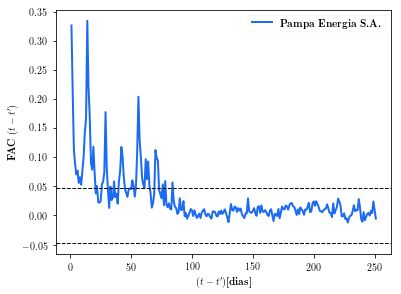

In [10]:
%matplotlib inline
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'figure.figsize': [6, 4.5]
   }
mpl.rcParams.update(params)

pampa = pd.DataFrame(acf_dict['PAMP'], columns = ['ACCoeff'])
sigma_pampa = pampa['ACCoeff'].std(ddof = 0)

plt.plot(lag_dict['PAMP'],acf_dict['PAMP'], linewidth=2, color='#1c6bf3',label = r'\textbf{Pampa Energia S.A.}')

plt.xlabel(r"\textbf{$\displaystyle \left(t-t'\right)$[dias]}")
plt.ylabel(r"\textbf{FAC $\displaystyle \left(t-t'\right)$ }")
plt.axhline(y = sigma_pampa, color ='k', linestyle = '--', linewidth = 1 )
plt.axhline(y = -sigma_pampa, color ='k', linestyle = '--', linewidth = 1 )
plt.legend()
plt.savefig('ACF_PAMP_abs.eps', format = 'eps', dpi = 1000)